In [26]:
# Data handling
import pandas as pd
import numpy as np

# Visualization (optional but good for debugging)
import matplotlib.pyplot as plt
import seaborn as sns

# Train-test split
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    matthews_corrcoef,
    confusion_matrix
)


In [27]:
# Load dataset
df = pd.read_csv(r"D:\JN_ML\Assignment 2\heart.csv")

# Show first 5 rows
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [28]:
# Check dataset shape
print("Shape of dataset:", df.shape)

# Check column names
print("Columns:", df.columns)


Shape of dataset: (918, 12)
Columns: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [29]:
# Check for missing values
print("Missing values per column:\n")
print(df.isnull().sum())


Missing values per column:

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [30]:
print("\nData Types:\n")
print(df.dtypes)



Data Types:

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [31]:
# Add derived feature
df["Cholesterol_per_Age"] = df["Cholesterol"] / df["Age"]

# Check new shape
print("New shape:", df.shape)


New shape: (918, 13)


In [32]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Check new shape
print("Shape after encoding:", df_encoded.shape)

df_encoded.head()


Shape after encoding: (918, 17)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Cholesterol_per_Age,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,7.225000,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,3.673469,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,7.648649,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,4.458333,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,3.611111,True,False,True,False,True,False,False,False,True


In [33]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Check new shape
print("Shape after encoding:", df_encoded.shape)

df_encoded.head()


Shape after encoding: (918, 17)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Cholesterol_per_Age,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,7.225000,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,3.673469,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,7.648649,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,4.458333,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,3.611111,True,False,True,False,True,False,False,False,True


In [34]:
# Separate features and target
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (918, 16)
y shape: (918,)


In [35]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (688, 16)
X_test shape: (230, 16)
y_train shape: (688,)
y_test shape: (230,)


In [36]:
# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Only transform test data
X_test_scaled = scaler.transform(X_test)

# Check shape
print("Scaled X_train shape:", X_train_scaled.shape)
print("Scaled X_test shape:", X_test_scaled.shape)


Scaled X_train shape: (688, 16)
Scaled X_test shape: (230, 16)


In [37]:
# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Train model
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = log_reg.predict(X_test_scaled)

# Predict probabilities (for AUC)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]


In [38]:
print("Logistic Regression Results:\n")

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("AUC:", roc_auc_score(y_test, y_prob_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("MCC:", matthews_corrcoef(y_test, y_pred_lr))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Results:

Accuracy: 0.8826086956521739
AUC: 0.9318094946869505
Precision: 0.8731343283582089
Recall: 0.9212598425196851
F1 Score: 0.896551724137931
MCC: 0.7625628067289341

Confusion Matrix:

[[ 86  17]
 [ 10 117]]


In [39]:
# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Train model
dt.fit(X_train, y_train)   # No need for scaled data

# Predictions
y_pred_dt = dt.predict(X_test)

# Probabilities for AUC
y_prob_dt = dt.predict_proba(X_test)[:, 1]


In [40]:
print("Decision Tree Results:\n")

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("AUC:", roc_auc_score(y_test, y_prob_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("MCC:", matthews_corrcoef(y_test, y_pred_dt))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Results:

Accuracy: 0.8173913043478261
AUC: 0.8144637260148305
Precision: 0.8294573643410853
Recall: 0.84251968503937
F1 Score: 0.8359375
MCC: 0.6301812574263481

Confusion Matrix:

[[ 81  22]
 [ 20 107]]


In [41]:
# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Train model
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)

# Probabilities
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]


In [42]:
print("KNN Results:\n")

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("AUC:", roc_auc_score(y_test, y_prob_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("MCC:", matthews_corrcoef(y_test, y_pred_knn))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_knn))


KNN Results:

Accuracy: 0.8956521739130435
AUC: 0.9427413806283922
Precision: 0.8992248062015504
Recall: 0.9133858267716536
F1 Score: 0.90625
MCC: 0.7887415106015687

Confusion Matrix:

[[ 90  13]
 [ 11 116]]


In [43]:
# Initialize Naive Bayes
nb = GaussianNB()

# Train model
nb.fit(X_train_scaled, y_train)

# Predictions
y_pred_nb = nb.predict(X_test_scaled)

# Probabilities
y_prob_nb = nb.predict_proba(X_test_scaled)[:, 1]


In [44]:
print("Naive Bayes Results:\n")

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("AUC:", roc_auc_score(y_test, y_prob_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print("MCC:", matthews_corrcoef(y_test, y_pred_nb))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_nb))


Naive Bayes Results:

Accuracy: 0.9043478260869565
AUC: 0.942664933873557
Precision: 0.9133858267716536
Recall: 0.9133858267716536
F1 Score: 0.9133858267716536
MCC: 0.8065897102667992

Confusion Matrix:

[[ 92  11]
 [ 11 116]]


In [45]:
# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train model
rf.fit(X_train, y_train)   # No scaling needed

# Predictions
y_pred_rf = rf.predict(X_test)

# Probabilities
y_prob_rf = rf.predict_proba(X_test)[:, 1]


In [46]:
print("Random Forest Results:\n")

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_prob_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("MCC:", matthews_corrcoef(y_test, y_pred_rf))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Results:

Accuracy: 0.8913043478260869
AUC: 0.9428942741380628
Precision: 0.8923076923076924
Recall: 0.9133858267716536
F1 Score: 0.9027237354085603
MCC: 0.7798818333164

Confusion Matrix:

[[ 89  14]
 [ 11 116]]


In [47]:
# Initialize XGBoost
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train model
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Probabilities
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]


C:\Users\USER\AppData\Local\Programs\Python\Python314\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:23:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [48]:
print("XGBoost Results:\n")

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("AUC:", roc_auc_score(y_test, y_prob_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("MCC:", matthews_corrcoef(y_test, y_pred_xgb))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Results:

Accuracy: 0.8695652173913043
AUC: 0.9298218790612338
Precision: 0.888
Recall: 0.8740157480314961
F1 Score: 0.8809523809523809
MCC: 0.736855194156082

Confusion Matrix:

[[ 89  14]
 [ 16 111]]


In [49]:
results = {
    "Model": [],
    "Accuracy": [],
    "AUC": [],
    "Precision": [],
    "Recall": [],
    "F1": [],
    "MCC": []
}

models_data = {
    "Logistic Regression": (y_pred_lr, y_prob_lr),
    "Decision Tree": (y_pred_dt, y_prob_dt),
    "KNN": (y_pred_knn, y_prob_knn),
    "Naive Bayes": (y_pred_nb, y_prob_nb),
    "Random Forest": (y_pred_rf, y_prob_rf),
    "XGBoost": (y_pred_xgb, y_prob_xgb)
}

for name, (y_pred, y_prob) in models_data.items():
    results["Model"].append(name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["AUC"].append(roc_auc_score(y_test, y_prob))
    results["Precision"].append(precision_score(y_test, y_pred))
    results["Recall"].append(recall_score(y_test, y_pred))
    results["F1"].append(f1_score(y_test, y_pred))
    results["MCC"].append(matthews_corrcoef(y_test, y_pred))

comparison_df = pd.DataFrame(results)

comparison_df.sort_values(by="Accuracy", ascending=False)


,Model,Accuracy,AUC,Precision,Recall,F1,MCC
3,Naive Bayes,0.904348,0.942665,0.913386,0.913386,0.913386,0.806590
2,KNN,0.895652,0.942741,0.899225,0.913386,0.906250,0.788742
4,Random Forest,0.891304,0.942894,0.892308,0.913386,0.902724,0.779882
0,Logistic Regression,0.882609,0.931809,0.873134,0.921260,0.896552,0.762563
5,XGBoost,0.869565,0.929822,0.888000,0.874016,0.880952,0.736855
1,Decision Tree,0.817391,0.814464,0.829457,0.842520,0.835938,0.630181


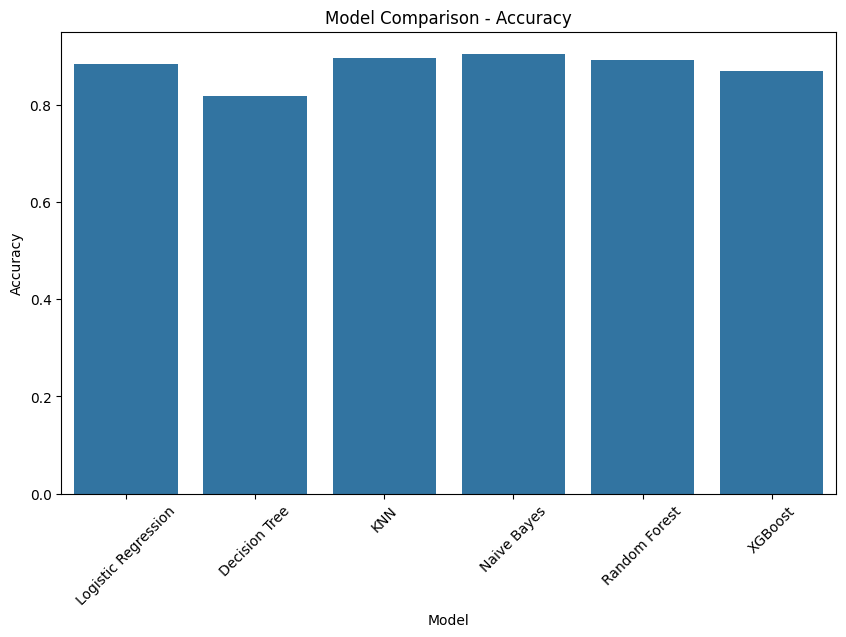

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Accuracy", data=comparison_df)
plt.xticks(rotation=45)
plt.title("Model Comparison - Accuracy")
plt.show()


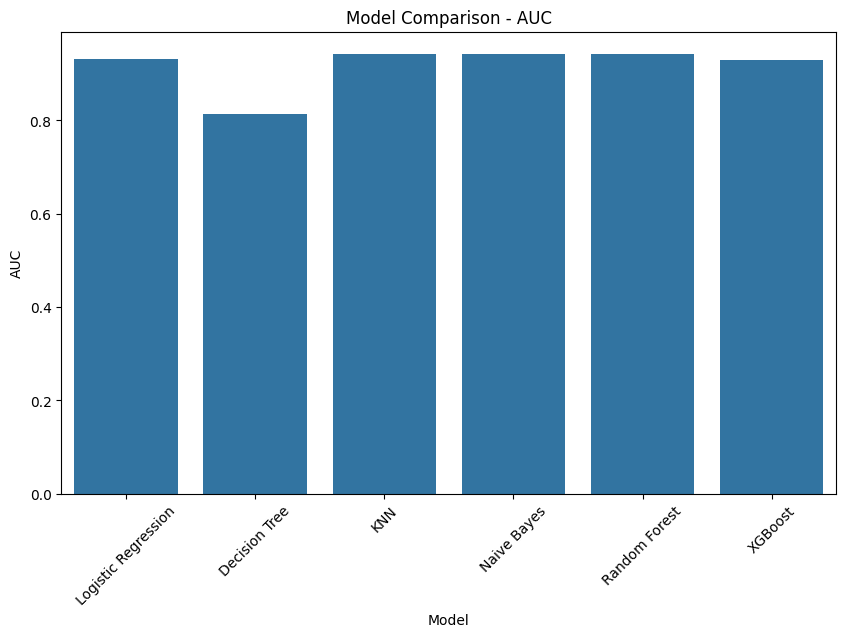

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="AUC", data=comparison_df)
plt.xticks(rotation=45)
plt.title("Model Comparison - AUC")
plt.show()


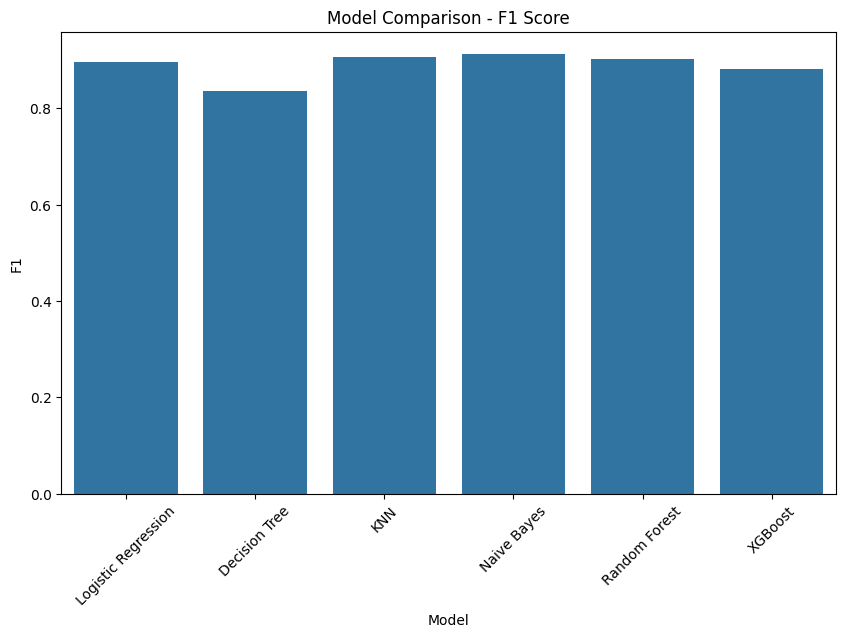

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="F1", data=comparison_df)
plt.xticks(rotation=45)
plt.title("Model Comparison - F1 Score")
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="MCC", data=comparison_df)
plt.xticks(rotation=45)
plt.title("Model Comparison - MCC")
plt.show()
